
# Scikit-Learn Exercises for Basic Data and Model Manipulation

This notebook provides a set of exercises designed to familiarize you with the basics of handling datasets, models,
train-test splits, and cross-validation in scikit-learn, essential for machine learning tasks.

## Exercises Overview
1. Loading and Exploring Datasets
2. Preprocessing Data
3. Creating and Evaluating Models
4. Train-Test Split
5. Cross-Validation
6. Hyperparameter Tuning

Each section will include a brief explanation followed by practical exercises.



## 1. Loading and Exploring Datasets

**Objective**: Learn how to load datasets from scikit-learn and explore their features.

**Exercises**:
1. Load the Iris dataset and display its description.
2. Find the number of samples and features in the dataset.
3. Visualize the distribution of target classes.


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

/tmp/ipython-input-3-1896256757.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=iris_df, palette='viridis') # Added palette argument


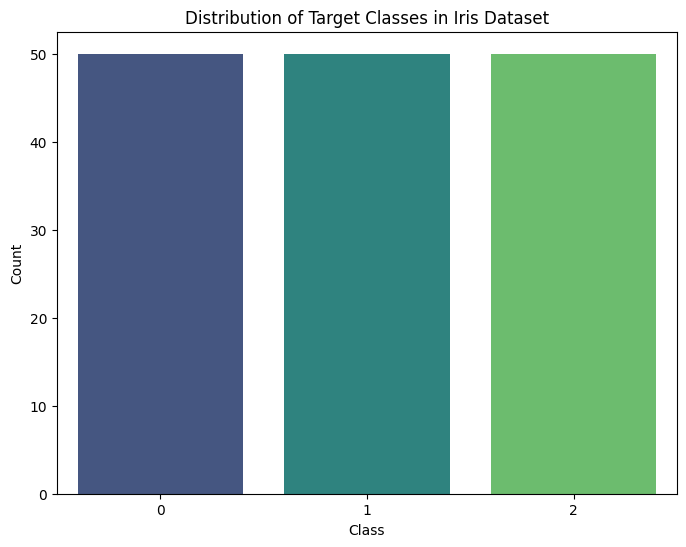

In [3]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1: Loading and Exploring Datasets

# 1.1 Load the Iris dataset and display its description.
iris = datasets.load_iris()
print(iris.DESCR)

# 1.2 Find the number of samples and features in the dataset.
num_samples, num_features = iris.data.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# 1.3 Visualize the distribution of target classes.
# Converting to DataFrame for easier plotting
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Plotting the distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=iris_df)
plt.title('Distribution of Target Classes in Iris Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## 2. Preprocessing Data

**Objective**: Understand basic data preprocessing techniques.

**Exercises**:
1. Standardize the features of a dataset.
2. Perform a principal component analysis (PCA) to reduce the dataset to two dimensions.


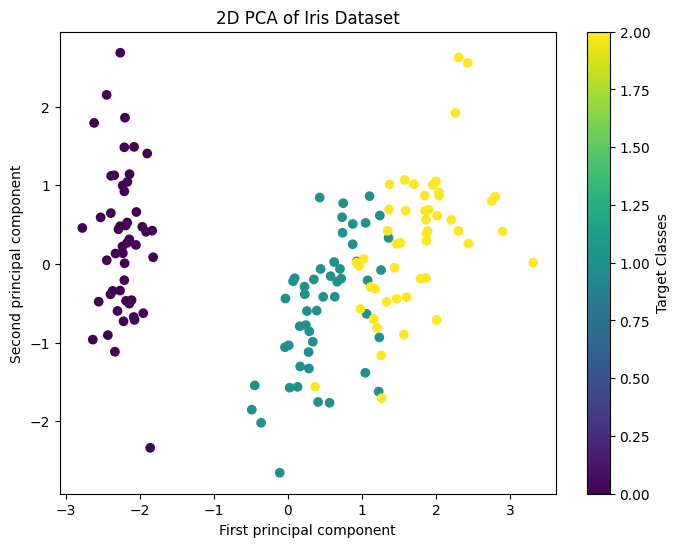

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exercise 2: Preprocessing Data

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# 2.1 Standardize the features of a dataset.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2.2 Perform a principal component analysis (PCA) to reduce the dataset to two dimensions.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization (Optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('2D PCA of Iris Dataset')
plt.colorbar(label='Target Classes')
plt.show()


## 3. Creating and Evaluating Models

**Objective**: Learn to create models and evaluate their performance.

**Exercises**:
1. Create a logistic regression model and fit it to a dataset.
2. Evaluate the model's accuracy using a test set.


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Exercise 3: Creating and Evaluating Models

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.1 Create a logistic regression model and fit it to the dataset.
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

# 3.2 Evaluate the model's accuracy using a test set.
y_pred = log_reg_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred)

# Outputting the accuracy
print("Model Accuracy:", model_accuracy)

Model Accuracy: 1.0



## 4. Train-Test Split

**Objective**: Perform train-test splits to prepare data for model training.

**Exercises**:
1. Split a dataset into training and testing sets.
2. Ensure the split has stratified sampling based on the target variable.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

# Exercise 4: Train-Test Split

# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 4.1 Split a dataset into training and testing sets.
# Splitting the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4.2 Ensure the split has stratified sampling based on the target variable.
# Performing a stratified split to maintain the distribution of the target variable
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Checking the distribution of target classes in the original and stratified splits
original_dist = pd.Series(y).value_counts(normalize=True)
train_dist = pd.Series(y_train_strat).value_counts(normalize=True)
test_dist = pd.Series(y_test_strat).value_counts(normalize=True)

# Outputting the distributions
original_dist, train_dist, test_dist

(0    0.333333
 1    0.333333
 2    0.333333
 Name: proportion, dtype: float64,
 1    0.333333
 0    0.333333
 2    0.333333
 Name: proportion, dtype: float64,
 2    0.333333
 1    0.333333
 0    0.333333
 Name: proportion, dtype: float64)


## 5. Cross-Validation

**Objective**: Understand and implement cross-validation.

**Exercises**:
1. Perform k-fold cross-validation on a model.
2. Compare the average performance across different folds.


In [5]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Exercise 5: Cross-Validation

# 5.1 Perform k-fold cross-validation on a model.
# Loading the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Creating a logistic regression model
model = LogisticRegression(max_iter=200)

# Setting up k-fold cross-validation (e.g., 5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation
scores = cross_val_score(model, X, y, cv=kf)

# 5.2 Compare the average performance across different folds.
average_performance = scores.mean()


## 6. Hyperparameter Tuning

**Objective**: Learn how to tune model hyperparameters for better performance.

**Exercises**:
1. Use GridSearchCV to find the best hyperparameters for a model.
2. Analyze the results of the grid search.


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Exercise 6: Hyperparameter Tuning

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6.1 Use GridSearchCV to find the best hyperparameters for a RandomForestClassifier.
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# 6.2 Analyze the results of the grid search.
# Best parameters
best_params = grid_search.best_params_

# Best score
best_score = grid_search.best_score_

# Results
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.95
